https://machinelearninggeek.com/backpropagation-neural-network-using-python/

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset
data = load_iris()

# Dividing the dataset into target variable and features
X=data.data
y=data.target

## Analisando os Dados

In [ ]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

## Split dos dados

In [ ]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)
print('X_train',len(X_train))
print('X_test',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train 130
X_test 20
y_train 130
y_test 20


## Informacoes Iniciais

In [ ]:
learning_rate = 0.1
iterations = 5000
N = y_train.size
 
# Input features
input_size = 4
 
# Hidden layers 
hidden_size = 2
 
# Output layer
output_size = 3 
 
results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

print(f'Pesos Iniciais:\nW1 -> {W1},\n W2 -> {W2}')

Pesos Iniciais:
W1 -> [[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]],
 W2 -> [[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


## Funções Objetivos

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


In [ ]:
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )

    print(f'Interacao: {itr} MSE: {mse}, Acc: {acc}')
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

Interacao: 0 MSE: 0.06095271245287713, Acc: 0.7076923076923077
Interacao: 1 MSE: 0.06095147530600617, Acc: 0.7076923076923077
Interacao: 2 MSE: 0.060950238761621596, Acc: 0.7076923076923077
Interacao: 3 MSE: 0.06094900281923375, Acc: 0.7076923076923077
Interacao: 4 MSE: 0.06094776747835342, Acc: 0.7076923076923077
Interacao: 5 MSE: 0.060946532738491835, Acc: 0.7076923076923077
Interacao: 6 MSE: 0.060945298599160716, Acc: 0.7076923076923077
Interacao: 7 MSE: 0.0609440650598722, Acc: 0.7076923076923077
Interacao: 8 MSE: 0.0609428321201389, Acc: 0.7076923076923077
Interacao: 9 MSE: 0.06094159977947389, Acc: 0.7076923076923077
Interacao: 10 MSE: 0.06094036803739067, Acc: 0.7076923076923077
Interacao: 11 MSE: 0.06093913689340318, Acc: 0.7076923076923077
Interacao: 12 MSE: 0.06093790634702586, Acc: 0.7076923076923077
Interacao: 13 MSE: 0.060936676397773594, Acc: 0.7076923076923077
Interacao: 14 MSE: 0.060935447045161656, Acc: 0.7076923076923077
Interacao: 15 MSE: 0.06093421828870585, Acc: 0.

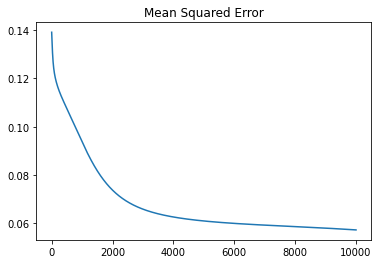

In [ ]:
results.mse.plot(title="Mean Squared Error")

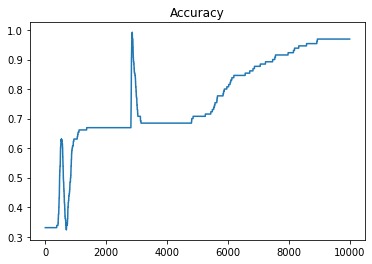

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.95
